# The Sparks Foundation - GRIP (JULY 2022)

## 📖📚 Data Science and Business Anaytics 📜🖋

## <i>Task-2: Prediction using Unsupervised ML</i> 

### Author: [Reddy Kumaraswamy](https://github.com/reddykumaraswamy)


### <b> Problem Statement(s): </b>
#### <ul> <li>Using the given Iris datasets, predict the optimum number of clusters and represent it visually.</li> </ul>

### <b> Datasets Used: </b> [Download Here](https://bit.ly/3kXTdox)


### <i> Importing all necessary libraries: </i>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('D:/TSF-Intern July 2022/datasets/Iris.csv')

data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.shape

(150, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# dropping Id column

data.drop('Id', axis=1, inplace=True)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
# check for nulls & duplicates
print(data.isnull().sum(), '\n\nNumber of duplicate rows: ' , data.duplicated().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

Number of duplicate rows:  3


In [7]:
## drop duplicate rows

data.drop_duplicates(inplace=True)  

data.shape[0]  # gives number of rows. Similarly, data.shape[1] will give number of columns

## now number of rows left 147, earlier there were 150 rows.

147

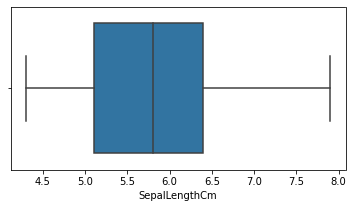

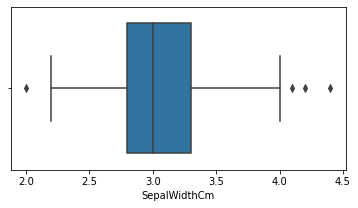

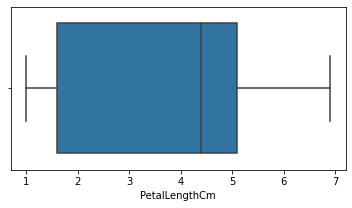

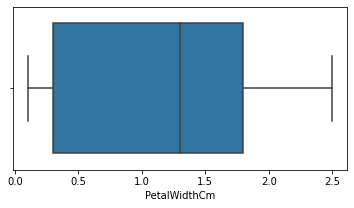

In [8]:
## Check for any outliers in the numeric data
for i in data.columns:
    if data[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(data[i])
        plt.show()

In [9]:
## Treating outliers present in the SepalWidthCm column

q1,q3 = np.percentile(data['SepalWidthCm'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
data['SepalWidthCm'] = data['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)

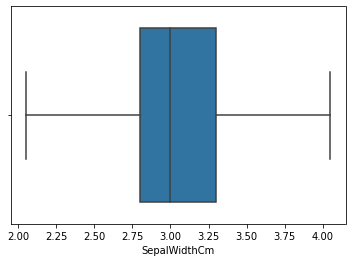

In [10]:
sns.boxplot(data['SepalWidthCm']);

### <i> Understanding the data: </i>

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


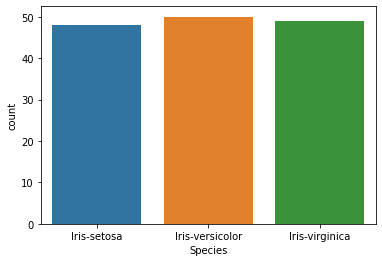

In [11]:
## Target class
print(data.Species.value_counts())
sns.countplot(data.Species);

In [12]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.052381,3.780272,1.208844
std,0.829100,0.426331,1.759111,0.757874
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


In [13]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

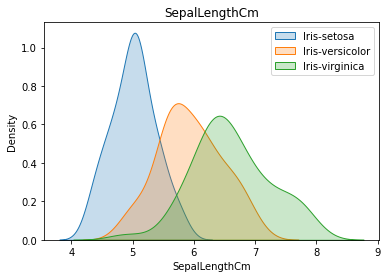

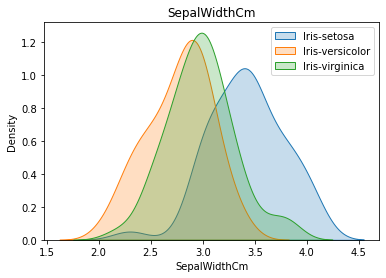

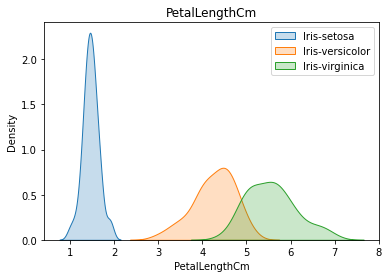

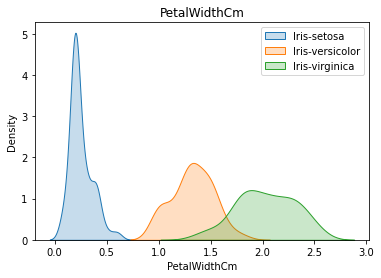

In [14]:
# Distributions of features by Species

for i in data.columns[:-1]:
    
    sns.kdeplot(data = data.loc[data.Species=='Iris-setosa'][i], label="Iris-setosa", shade=True)
    
    sns.kdeplot(data = data.loc[data.Species=='Iris-versicolor'][i], label="Iris-versicolor", shade=True)

    sns.kdeplot(data = data.loc[data.Species=='Iris-virginica'][i], label="Iris-virginica", shade=True)

    plt.title(i);
    plt.legend()
    plt.show()

In [15]:
## Inference: We can not distinguish between the species based on Sepal Length/Width 
              # but we can clearly tell setosa apart from the other species based on Petal Length/Width

In [16]:
## Correlation Matrix
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110155,0.871305,0.817058
SepalWidthCm,-0.110155,1.000000,-0.420140,-0.355139
PetalLengthCm,0.871305,-0.420140,1.000000,0.961883
PetalWidthCm,0.817058,-0.355139,0.961883,1.000000


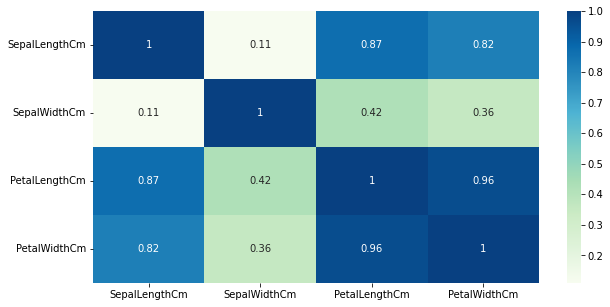

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()), cmap='GnBu', annot=True);

### <i> K-means Clustering: </i>

In [18]:
from sklearn.cluster import KMeans

In [23]:
SSE = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 9, random_state = 0)
    kmeans.fit(data.iloc[:,[0,1,2,3]])
    SSE.append(kmeans.inertia_)

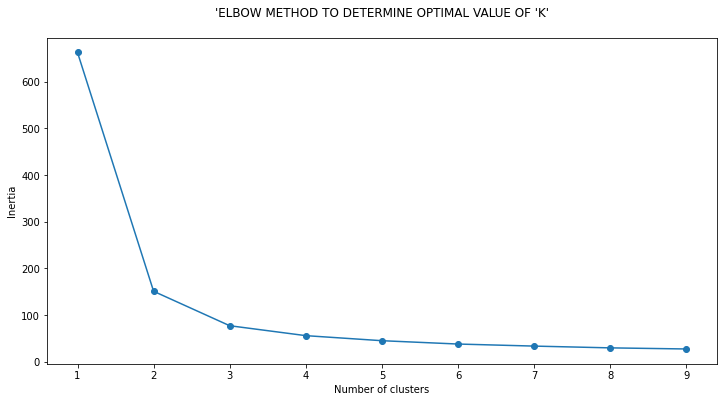

In [24]:
df = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'], df['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');
plt.title("'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K'\n");

In [28]:
kmeans = KMeans(n_clusters = i, init='k-means++', max_iter = 300, n_init = 9, random_state = 0)
kmeans.fit(data.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[4.6952381 , 3.12380952, 1.40952381, 0.2       ],
       [6.04117647, 2.73529412, 5.02352941, 1.78823529],
       [6.56818182, 3.08636364, 5.53636364, 2.16363636],
       [5.58      , 2.65      , 4.03      , 1.235     ],
       [5.25555556, 3.65      , 1.5037037 , 0.28888889],
       [7.475     , 3.125     , 6.3       , 2.05      ],
       [6.65454545, 3.04545455, 4.66363636, 1.47272727],
       [6.05384615, 2.83846154, 4.43846154, 1.39230769],
       [5.        , 2.3125    , 3.275     , 1.025     ]])

In [29]:
kmeans.labels_

array([4, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       0, 4, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 4, 0,
       4, 0, 4, 0, 6, 6, 6, 3, 6, 7, 6, 8, 6, 3, 8, 7, 3, 7, 3, 6, 7, 3,
       7, 3, 1, 7, 1, 7, 7, 6, 6, 6, 7, 3, 3, 3, 3, 1, 3, 7, 6, 7, 3, 3,
       3, 7, 3, 8, 3, 3, 3, 7, 8, 3, 2, 1, 5, 2, 2, 5, 3, 5, 2, 5, 2, 1,
       2, 1, 1, 2, 2, 5, 5, 1, 2, 1, 5, 1, 2, 5, 1, 1, 2, 5, 5, 5, 2, 1,
       1, 5, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1])

In [30]:
data['cluster'] = kmeans.labels_

data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,4
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,4
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [31]:
display(data['cluster'].value_counts(), data['Species'].value_counts())

4    27
2    22
0    21
3    20
1    17
7    13
5    12
6    11
8     4
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

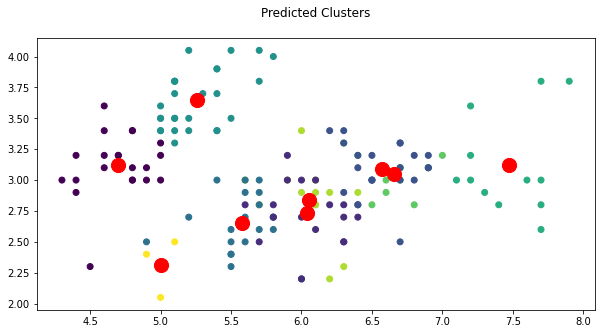

In [32]:
plt.figure(figsize=(10,5))
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=data.cluster)
plt.title('Predicted Clusters\n')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1] ,  s=200, c='red', label = 'Centroids')
plt.show()

In [33]:
## the model has identified iris-setosa with 100% accuracy

data.loc[data['Species']=='Iris-setosa']['cluster'].value_counts()

4    27
0    21
Name: cluster, dtype: int64

In [34]:
data.loc[data['Species']=='Iris-versicolor']['cluster'].value_counts()

3    19
7    13
6    11
8     4
1     3
Name: cluster, dtype: int64

In [35]:
data.loc[data['Species']=='Iris-virginica']['cluster'].value_counts()

2    22
1    14
5    12
3     1
Name: cluster, dtype: int64

In [36]:
data['Species_encoded'] = data['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,4,1
1,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5.0,3.6,1.4,0.2,Iris-setosa,4,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [37]:
from sklearn.metrics import classification_report
print(classification_report(data['Species_encoded'],data['cluster']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        48
           2       1.00      0.45      0.62        49
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0

    accuracy                           0.15       147
   macro avg       0.11      0.05      0.07       147
weighted avg       0.33      0.15      0.21       147



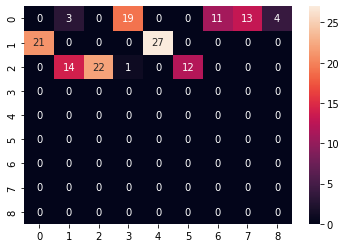

In [38]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(data['Species_encoded'],data['cluster']), annot=True);